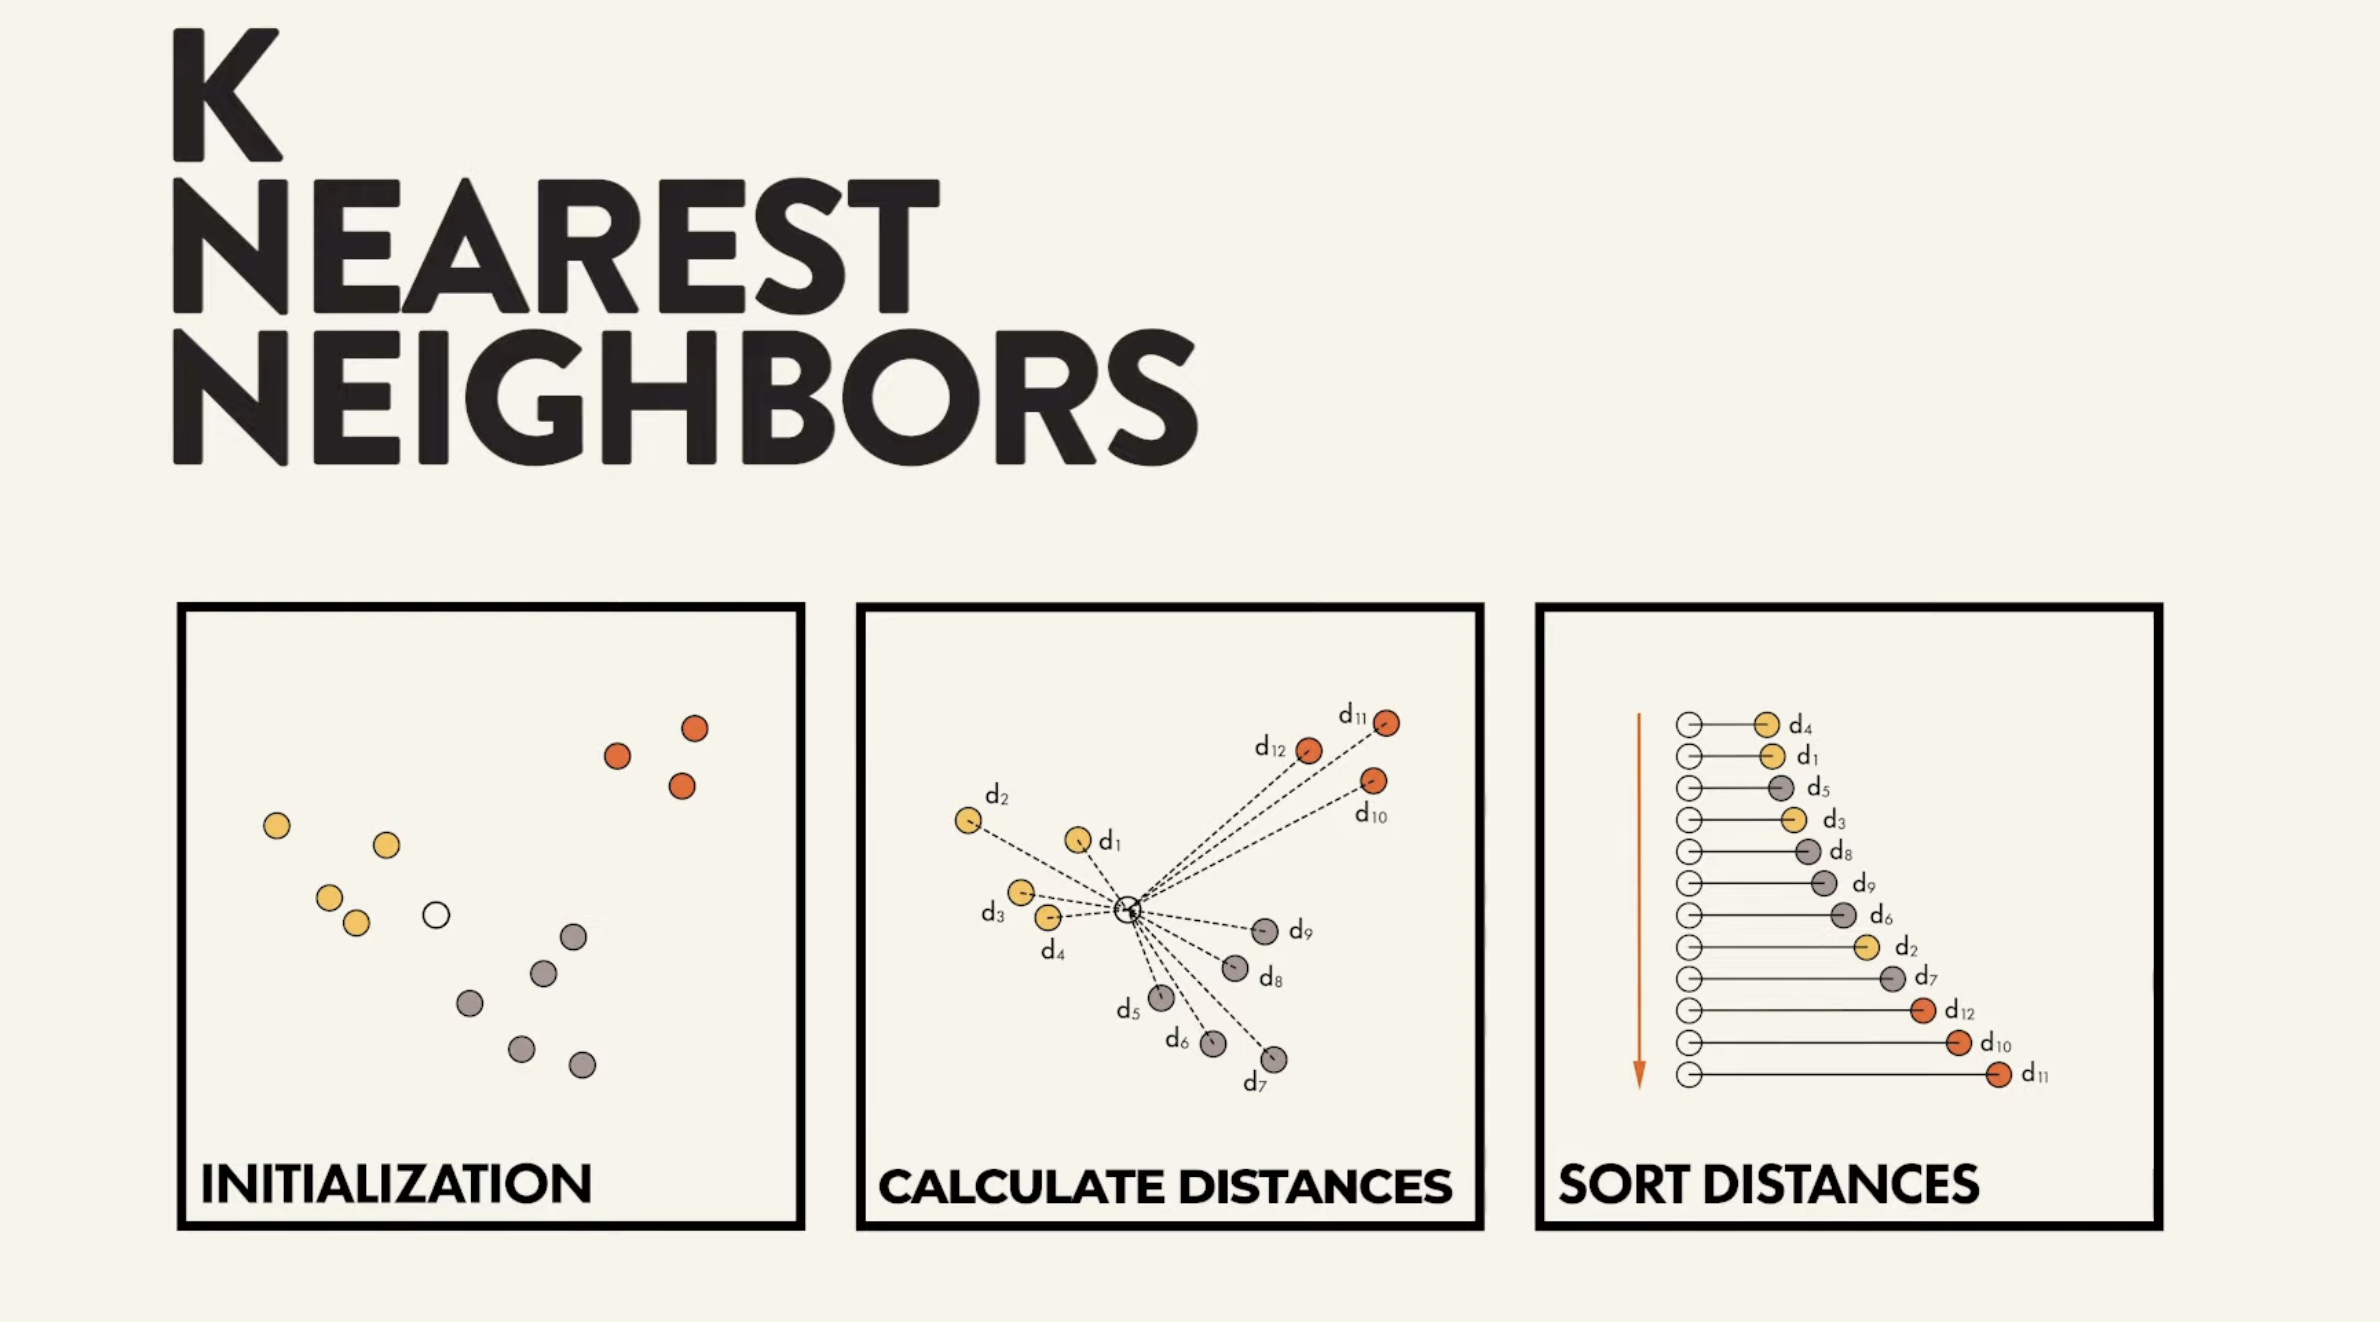

### What is K Nearest Neighbors (KNN)?
- Supervised Algorithm
    - Classification
    - Regression
<br>
<br>
- Makes predictions based on how close a new data point is to known data points.
<br>
<br>
- Lazy Learner: 
    - does no actual training (computations) with the Train data
    - stores the training data
    - computes distance unseen data is from the train data
<br>
<br>
- Works best with smaller samples as opposed to large.
---

# How kNN Works:
![int](https://media.giphy.com/media/JkSouhjLodOMKaPBst/giphy.gif)
<br>
<br>
![dist](https://media.giphy.com/media/Qf2a09jJOdYHYTnmMI/giphy.gif)
<br>
<br>
![sort](https://media.giphy.com/media/IbKkSMZev6BOkRdh0r/giphy.gif)

<a href = "https://www.youtube.com/watch?v=0p0o5cmgLdE">YouTube Reference Video</a>

In [1]:
# Quiet my warnings for the sake of the lesson:
import warnings
warnings.filterwarnings("ignore")

# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data

# Acquire (Iris Dataset)

In [ ]:
# read Iris data from pydatset
df = data('iris')

In [ ]:
df.head()

In [ ]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

### In this scenario, the units of measurements within `iris` are consistent. 
Therefore, scaling will not be necessary. (We'll cover this in Regression)

___
# Prepare/Preprocessing

In [5]:
def split_data(df,target):
    '''
    This function will:
    - take in a given DataFrame  
    - stratify on target (formatted as a "string")
    return train, validate, test DataFrames.
    '''
    # 20/80 test/train_validate
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    
    # 30/70 validate/train of the 80%
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate[target])
    return train, validate, test


In [ ]:
train, validate, test = split_data(df, 'species')

In [ ]:
# inspect size
train.shape, validate.shape, test.shape

In [ ]:
# inspect
train.info(), validate.info(), test.info()

In [ ]:
# create X & y version of train/validate/test
# where X contains the features we want to use and y is a series with just the target variable

X_train = train.drop(columns=['species', 'petal_length', 'petal_width'])
y_train = train.species

X_validate = validate.drop(columns=['species', 'petal_length', 'petal_width'])
y_validate = validate.species

X_test = test.drop(columns=['species', 'petal_length', 'petal_width'])
y_test = test.species

In [ ]:
#Compare df columns

print(f"""train:
{train.columns.to_list()} 
_____________________________________________
X_train:
{X_train.columns.to_list()}
_____________________________________________
X_validate:
{X_validate.columns.to_list()}
""")

In [ ]:
# Visualize training data


In [ ]:
# With color distinction


___
# Train Model
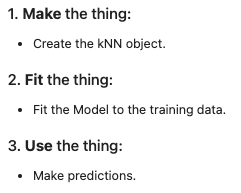


### 1. **Make** the thing: 
- Create the kNN object.
    
<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">sklearn kNN Documentation</a>

**Defaults**:
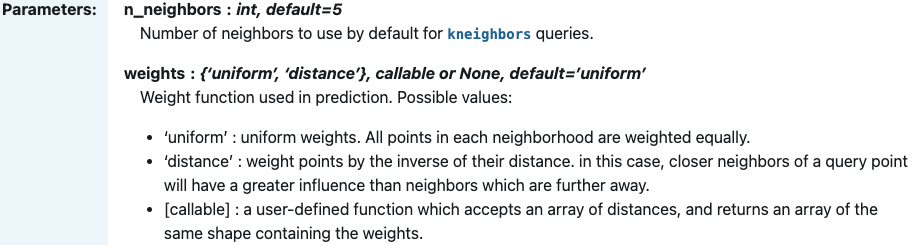

In [ ]:
# set to defaults


### 2. **Fit** the thing: 
- Fit the Model to the training data.

### 3. **Use** the thing: 
- Make predictions.

### Estimate Probability

In [ ]:
# the model object's classes_ property 
# is the most dependable way to get the order of predict_proba labels.


___
# Evaluate Model

## Compute the Accuracy

## Create a Classification Report

## Lets Do it Again

In [ ]:
# MAKE THE THING: Create KNN Object

# FIT THE THING: Fit object to training data

# USE  THE THING: Make predictions on training data


# Finding the Best value for k

# Next Steps
- We only used `sepal_length` and `sepal_width`. We can try new models with different and/or additional features. 


There are other hyperparameters we can tweak:

- `weights`: Uniform is the default (all points are treated equally), but we can switch to a 'distance' approach where nearer neighbors are given more weight in the voting process
- `algorithm`: Large datasets use a sampling algorithm to save on computational cost. We can try different samplers. 
- `metric`: There is more than one way to measure distance

